### **Project Title**

**Enhancing Stock Market Prediction on Big Data: A Hybrid Deep Learning Model Integrating Time-Series and Sentiment Analysis**

---

### **Domain Selection and Dataset Acquisition**

**Domain:** Quantitative Finance & Predictive Analytics

**Big Data Set Identification:**
To address the complex challenge of stock market forecasting, this project utilizes a true Big Data approach by combining two large, distinct, and heterogeneous datasets:

1.  **Structured Time-Series Data:** We acquired historical daily stock data for **80 major stocks** across four key sectors (Technology, Financial, Healthcare, and Consumer & Retail). The data spans over a decade (January 2009 - December 2020), sourced from the Yahoo Finance API. This structured dataset contains over **230,000 records**, each with multiple features like Open, High, Low, Close, and Volume, in addition to several engineered technical indicators (e.g., SMA, Volatility).

2.  **Unstructured Text Data:** We sourced a comprehensive financial news dataset from Kaggle ("Daily Financial News for 6000+ Stocks") [**Dataset link**](https://www.kaggle.com/datasets/miguelaenlle/massive-stock-news-analysis-db-for-nlpbacktests/data?select=analyst_ratings_processed.csv). This dataset contains over **1.4 million news headlines** from 2009 to mid-2020. This represents a large volume of unstructured text data that must be processed to extract meaningful sentiment signals.

The combination of high **Volume** (millions of data points), **Variety** (structured numerical data and unstructured text), and **Velocity** (representing daily market changes) firmly establishes this as a Big Data project.

### **Problem Statement**

The primary challenge in financial forecasting is the immense difficulty of predicting stock market movements with high accuracy. This project directly addresses several key limitations of traditional forecasting methods:

* **Exclusive Reliance on Price Data:** Traditional models often rely exclusively on historical price and volume data, failing to incorporate a critical external driver of market behavior: public and investor sentiment.
* **Ignoring Unstructured Data:** A vast amount of valuable information is locked away in unstructured text data, such as financial news headlines. Integrating this data is a significant technical challenge.
* **Fulfilling the Research Gap:** The academic research paper provided for this project explicitly identifies the integration of sentiment data from diverse sources as a key area for future work to enhance predictive power.

This project aims to solve these problems by designing and implementing a scalable Big Data solution. We will engineer a unified dataset that **enriches historical price data with sentiment** as a core feature, enabling us to build more nuanced machine learning models that can forecast not only the **price** of a stock (a regression task) but also its next-day **direction** (a classification task).

### **Project Objectives**

The primary motivation for this project is derived from the "future scope" identified in contemporary academic literature, specifically the research paper **"A comprehensive review on multiple hybrid deep learning approaches for stock prediction" (Shah et al., 2022)**. The paper concludes that integrating sentiment analysis with hybrid deep learning models is a critical next step for enhancing prediction accuracy. Guided by this, our project is structured around the following core objectives:

1.  **To Engineer a Big Data Integration Pipeline:** The first objective is to design and implement a robust, end-to-end data pipeline. This involves acquiring, cleaning, and merging two large-scale, heterogeneous datasets: structured, time-series stock market data and unstructured, text-based financial news headlines. The outcome will be a single, feature-rich master dataset suitable for advanced modeling.

2.  **To Implement a Scalable Processing Architecture with Apache Spark:** In line with Big Data best practices, this objective is to utilize the Apache Spark framework to manage and process the large volume of integrated data. We will implement and justify a data partitioning strategy (by `Symbol` and `Year`) to demonstrate a scalable, high-performance architecture that overcomes the limitations of traditional single-machine processing.

3.  **To Develop and Train Hybrid Predictive Models:** This objective focuses on the practical implementation of the research paper's recommendations. We will build and train two distinct models to fulfill the project requirements:
    * **Classification Model:** A Random Forest classifier will be used to predict the next-day *direction* of the stock price (Up or Down), providing a model for directional trading strategies.
    * **Regression Model:** A **hybrid CNN-LSTM deep learning model** will be developed to predict the actual stock *price*. This specific architecture is chosen based on its proven effectiveness in capturing both spatial patterns (via CNN) and temporal dependencies (via LSTM) from complex financial data.

4.  **To Conduct a Rigorous, Multi-faceted Model Evaluation:** The final objective is to perform a comprehensive evaluation of both models. This involves not only calculating standard performance metrics—**Accuracy, Precision, and Recall** for the classification task and **Root Mean Squared Error (RMSE)** for the regression task—but also generating insightful visualizations and analyses through Exploratory Data Analysis (EDA) to fully understand the dataset's characteristics and the models' performance.

*(Note: A full list of academic references, including the motivating research paper, will be provided in the reference section of this report.)*

### **Data Mining Goals**

The data mining goals for this project are primarily **predictive**, with a secondary goal of **pattern discovery** to derive insights from the dataset. These goals are directly aligned with the project's classification and regression tasks.

* **Prediction (Classification):** Our first goal is to predict a binary categorical variable: will a stock's `Close` price be higher (**1**) or lower/the same (**0**) on the next trading day? This is a high-value goal for developing directional trading strategies, where the accuracy of predicting the *trend* is more important than the exact price.

* **Prediction (Regression):** Our second goal is to predict a continuous numerical variable: the exact `Close` price of a stock on the next trading day. This addresses the challenge of price forecasting and is useful for setting price targets, and understanding the potential magnitude of market movements.

* **Pattern Discovery (EDA):** Through Exploratory Data Analysis, we aim to uncover significant patterns and relationships within the Big Data set. This includes identifying the most volatile stocks, discovering the correlation between news sentiment and daily returns, and analyzing performance trends across different market sectors and time periods to better understand the market's underlying dynamics.

In [1]:
# Install necessary libraries for data processing, Spark, and deep learning
!pip install pyspark
!pip install pandas
!pip install tensorflow
!pip install vaderSentiment
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn

# Import the libraries we will use
import pandas as pd
import numpy as np
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, to_date, year, month, udf
from pyspark.sql.types import FloatType
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("✅ All libraries are installed and imported successfully!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.2 MB/s eta 0:00:00
✅ All libraries are installed and imported successfully!


In [2]:
# Install the necessary library for downloading stock data
!pip install yfinance

import pandas as pd
import yfinance as yf
from datetime import datetime

def download_aligned_big_data_stocks():
    """
    Downloads and preprocesses a comprehensive stock market dataset with a timeline
    aligned to the historical news data (2009-2020).
    """

    major_stocks = [
        'AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'TSLA', 'NVDA', 'NFLX', 'ADBE', 'CRM',
        'INTC', 'AMD', 'ORCL', 'IBM', 'CSCO', 'QCOM', 'TXN', 'AVGO', 'MU', 'PYPL',
        'JPM', 'BAC', 'WFC', 'C', 'GS', 'MS', 'AXP', 'V', 'MA', 'BLK',
        'SCHW', 'USB', 'PNC', 'TFC', 'COF', 'BK', 'STT', 'FITB', 'RF', 'SPGI',
        'JNJ', 'UNH', 'PFE', 'ABT', 'TMO', 'DHR', 'BMY', 'ABBV', 'LLY', 'MRK',
        'AMGN', 'GILD', 'ISRG', 'VRTX', 'REGN', 'BIIB', 'CVS', 'CI', 'HUM', 'MDT',
        'WMT', 'HD', 'PG', 'KO', 'PEP', 'MCD', 'NKE', 'SBUX', 'TGT', 'LOW',
        'COST', 'DIS', 'CMCSA', 'VZ', 'T', 'F', 'GM', 'CL', 'KMB', 'GIS'
    ]

    start_date = "2009-01-01"
    end_date = "2020-12-31"

    print(f"🔄 Downloading ALIGNED Big Data: {len(major_stocks)} stocks from {start_date} to {end_date}")

    all_data = []
    for i, symbol in enumerate(major_stocks):
        try:
            print(f"📈 Processing {symbol} ({i+1}/{len(major_stocks)})")
            stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)

            if not stock_data.empty:
                stock_data.reset_index(inplace=True)
                stock_data['Symbol'] = symbol

                # Pre-calculate technical indicators
                stock_data['Daily_Return'] = stock_data['Close'].pct_change()
                stock_data['Volatility'] = stock_data['Daily_Return'].rolling(window=20).std()
                stock_data['SMA_20'] = stock_data['Close'].rolling(window=20).mean()
                stock_data['SMA_50'] = stock_data['Close'].rolling(window=50).mean()
                stock_data['Volume_MA'] = stock_data['Volume'].rolling(window=20).mean()

                all_data.append(stock_data)

        except Exception as e:
            print(f"⚠️ Failed to download {symbol}: {e}")

    combined_data = pd.concat(all_data, ignore_index=True)

    # --- KEY CHANGE: The aggressive dropna() line has been removed ---
    # combined_data.dropna(inplace=True)

    print("\n✅ ALIGNED BIG DATASET CREATED SUCCESSFULLY:")
    print(f"📊 Total records: {len(combined_data):,}")
    print(f"🏢 Total unique stocks: {combined_data['Symbol'].nunique()}")
    print(f"📅 Date range: {combined_data['Date'].min().date()} to {combined_data['Date'].max().date()}")

    return combined_data

# --- Execute the function and save the data ---
stock_data = download_aligned_big_data_stocks()
stock_data.to_csv('big_stock_data_aligned.csv', index=False)
print("\n💾 File 'big_stock_data_aligned.csv' has been saved. It should now contain all the records.")

🔄 Downloading ALIGNED Big Data: 80 stocks from 2009-01-01 to 2020-12-31
📈 Processing AAPL (1/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing MSFT (2/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing GOOGL (3/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing AMZN (4/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing META (5/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing TSLA (6/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing NVDA (7/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing NFLX (8/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing ADBE (9/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing CRM (10/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing INTC (11/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing AMD (12/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing ORCL (13/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing IBM (14/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing CSCO (15/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing QCOM (16/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing TXN (17/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing AVGO (18/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing MU (19/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing PYPL (20/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing JPM (21/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing BAC (22/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing WFC (23/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing C (24/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing GS (25/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing MS (26/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing AXP (27/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing V (28/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing MA (29/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing BLK (30/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing SCHW (31/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing USB (32/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing PNC (33/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing TFC (34/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing COF (35/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing BK (36/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing STT (37/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing FITB (38/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing RF (39/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing SPGI (40/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing JNJ (41/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing UNH (42/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing PFE (43/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing ABT (44/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing TMO (45/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing DHR (46/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing BMY (47/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing ABBV (48/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing LLY (49/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing MRK (50/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing AMGN (51/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing GILD (52/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing ISRG (53/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing VRTX (54/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing REGN (55/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing BIIB (56/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing CVS (57/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing CI (58/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing HUM (59/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing MDT (60/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing WMT (61/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing HD (62/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing PG (63/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing KO (64/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing PEP (65/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing MCD (66/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing NKE (67/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing SBUX (68/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing TGT (69/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing LOW (70/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing COST (71/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing DIS (72/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing CMCSA (73/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing VZ (74/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing T (75/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing F (76/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing GM (77/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing CL (78/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing KMB (79/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing GIS (80/80)


/tmp/ipython-input-506575879.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)



✅ ALIGNED BIG DATASET CREATED SUCCESSFULLY:
📊 Total records: 237,110
🏢 Total unique stocks: 80
📅 Date range: 2009-01-02 to 2020-12-30

💾 File 'big_stock_data_aligned.csv' has been saved. It should now contain all the records.


In [3]:
import pandas as pd
import csv # Import the CSV library for robust file reading

# This is the same list of stocks from Step 1
major_stocks = [
    'AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'TSLA', 'NVDA', 'NFLX', 'ADBE', 'CRM',
    'INTC', 'AMD', 'ORCL', 'IBM', 'CSCO', 'QCOM', 'TXN', 'AVGO', 'MU', 'PYPL',
    'JPM', 'BAC', 'WFC', 'C', 'GS', 'MS', 'AXP', 'V', 'MA', 'BLK',
    'SCHW', 'USB', 'PNC', 'TFC', 'COF', 'BK', 'STT', 'FITB', 'RF', 'SPGI',
    'JNJ', 'UNH', 'PFE', 'ABT', 'TMO', 'DHR', 'BMY', 'ABBV', 'LLY', 'MRK',
    'AMGN', 'GILD', 'ISRG', 'VRTX', 'REGN', 'BIIB', 'CVS', 'CI', 'HUM', 'MDT',
    'WMT', 'HD', 'PG', 'KO', 'PEP', 'MCD', 'NKE', 'SBUX', 'TGT', 'LOW',
    'COST', 'DIS', 'CMCSA', 'VZ', 'T', 'F', 'GM', 'CL', 'KMB', 'GIS'
]

print("--- Starting Step 2 (Definitive Fix): Processing News Data ---")

# Use the exact file path you provided
file_path = '/content/analyst_ratings_processed.csv'
data_list = []

try:
    # 1. Robustly read the CSV file line-by-line to bypass pandas parsing errors
    print(f"📰 Robustly loading '{file_path}' to handle formatting errors...")
    with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
        # The csv.reader will correctly handle fields that contain commas
        reader = csv.reader(file)
        # Skip the header row
        header = next(reader)

        for row in reader:
            # Ensure the row has the expected number of columns before processing
            if len(row) == 4:
                # The columns are: old_index, title, date, stock
                data_list.append({
                    'headline': row[1],
                    'date': row[2],
                    'Symbol': row[3]
                })

    # 2. Create a Pandas DataFrame from the cleaned list of dictionaries
    news_df = pd.DataFrame(data_list)
    print(f"✅ Successfully loaded and parsed {len(news_df):,} articles.")

    # 3. Process the 'date' column
    news_df['date'] = pd.to_datetime(news_df['date'], errors='coerce', utc=True)
    news_df.dropna(subset=['date'], inplace=True) # Remove rows where date conversion failed

    # Extract just the date part for merging with our daily stock data
    news_df['Date'] = news_df['date'].dt.date
    news_df['Date'] = pd.to_datetime(news_df['Date'])

    # 4. Filter the news data to keep only articles for our stocks
    print(f"🔍 Filtering news to match the {len(major_stocks)} stocks...")
    filtered_news = news_df[news_df['Symbol'].isin(major_stocks)]
    print(f"📊 Found {len(filtered_news):,} relevant articles.")

    # 5. Finalize the dataset, keeping only essential columns
    final_news_df = filtered_news[['Date', 'Symbol', 'headline']]

    # 6. Save the cleaned and filtered data to a new file
    final_news_df.to_csv('filtered_news_data.csv', index=False)
    print("\n✅ NEWS DATA PREPARATION COMPLETE:")
    print("💾 A new file 'filtered_news_data.csv' has been created.")
    print("\nFinal News Data Head:")
    print(final_news_df.head())

except FileNotFoundError:
    print(f"\n⚠️ ERROR: '{file_path}' not found.")
    print("Please make sure the file is uploaded and the path is correct.")
except Exception as e:
    print(f"\nAn unexpected error occurred: {e}")

--- Starting Step 2 (Definitive Fix): Processing News Data ---
📰 Robustly loading '/content/analyst_ratings_processed.csv' to handle formatting errors...
✅ Successfully loaded and parsed 1,397,891 articles.
🔍 Filtering news to match the 80 stocks...
📊 Found 101,090 relevant articles.

✅ NEWS DATA PREPARATION COMPLETE:
💾 A new file 'filtered_news_data.csv' has been created.

Final News Data Head:
           Date Symbol                                           headline
3664 2020-06-10   AAPL  Tech Stocks And FAANGS Strong Again To Start D...
3665 2020-06-10   AAPL      10 Biggest Price Target Changes For Wednesday
3666 2020-06-10   AAPL  Benzinga Pro's Top 5 Stocks To Watch For Wed.,...
3667 2020-06-10   AAPL  Deutsche Bank Maintains Buy on Apple, Raises P...
3668 2020-06-10   AAPL  Apple To Let Users Trade In Their Mac Computer...


In [5]:
import pandas as pd
import yfinance as yf
from datetime import datetime

print("--- Starting Final Data Preparation (with Transformation) ---")

try:
    # --- Part A: Download all stock data in its native format ---
    major_stocks = [
        'AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'TSLA', 'NVDA', 'NFLX', 'ADBE', 'CRM',
        'INTC', 'AMD', 'ORCL', 'IBM', 'CSCO', 'QCOM', 'TXN', 'AVGO', 'MU', 'PYPL',
        'JPM', 'BAC', 'WFC', 'C', 'GS', 'MS', 'AXP', 'V', 'MA', 'BLK',
        'SCHW', 'USB', 'PNC', 'TFC', 'COF', 'BK', 'STT', 'FITB', 'RF', 'SPGI',
        'JNJ', 'UNH', 'PFE', 'ABT', 'TMO', 'DHR', 'BMY', 'ABBV', 'LLY', 'MRK',
        'AMGN', 'GILD', 'ISRG', 'VRTX', 'REGN', 'BIIB', 'CVS', 'CI', 'HUM', 'MDT',
        'WMT', 'HD', 'PG', 'KO', 'PEP', 'MCD', 'NKE', 'SBUX', 'TGT', 'LOW',
        'COST', 'DIS', 'CMCSA', 'VZ', 'T', 'F', 'GM', 'CL', 'KMB', 'GIS'
    ]
    start_date = "2009-01-01"
    end_date = "2020-12-31"

    print(f"🔄 Part A: Downloading data for {len(major_stocks)} stocks...")
    # yfinance naturally creates a multi-level column structure when downloading multiple stocks
    stock_df_wide = yf.download(major_stocks, start=start_date, end=end_date)
    print("✅ Download complete.")

    # --- Part B: Transform the data from "wide" to "long" format ---
    print("🔧 Part B: Transforming data structure...")
    # The .stack() method pivots the stock symbols from the columns into the rows,
    # creating a long-format DataFrame. This is the key to solving the merge error.
    stock_df_long = stock_df_wide.stack()
    stock_df_long.index.names = ['Date', 'Symbol'] # Name the new index levels
    stock_df_long.reset_index(inplace=True) # Convert the index levels into columns
    print("✅ Transformation complete.")

    # --- Part C: Calculate Technical Indicators on the clean, long-format data ---
    print("📈 Part C: Calculating technical indicators...")
    # We must sort by Symbol and Date to ensure the rolling calculations are correct
    stock_df_long.sort_values(by=['Symbol', 'Date'], inplace=True)

    # Calculate indicators per stock group
    stock_df_long['Daily_Return'] = stock_df_long.groupby('Symbol')['Close'].pct_change()
    stock_df_long['Volatility'] = stock_df_long.groupby('Symbol')['Daily_Return'].rolling(window=20).std().reset_index(0,drop=True)
    stock_df_long['SMA_20'] = stock_df_long.groupby('Symbol')['Close'].rolling(window=20).mean().reset_index(0,drop=True)
    stock_df_long['SMA_50'] = stock_df_long.groupby('Symbol')['Close'].rolling(window=50).mean().reset_index(0,drop=True)
    stock_df_long['Volume_MA'] = stock_df_long.groupby('Symbol')['Volume'].rolling(window=20).mean().reset_index(0,drop=True)
    print("✅ Indicator calculation complete.")

    # --- Part D: Load and Merge News Data ---
    print("📂 Part D: Loading and merging news data...")
    news_df = pd.read_csv('filtered_news_data.csv')
    news_df['Date'] = pd.to_datetime(news_df['Date'])

    # Group news headlines
    news_grouped = news_df.groupby(['Date', 'Symbol'])['headline'].apply('. '.join).reset_index()

    # Merge the clean, long-format stock data with the news data
    combined_df = pd.merge(stock_df_long, news_grouped, on=['Date', 'Symbol'], how='left')
    combined_df['headline'].fillna("", inplace=True)
    print("✅ Merging complete.")

    # --- Part E: Final Cleaning and Saving ---
    print("🧹 Part E: Final cleaning...")
    rows_before = len(combined_df)
    combined_df.dropna(inplace=True)
    rows_after = len(combined_df)
    print(f"🗑️ Removed {rows_before - rows_after:,} initial rows with incomplete data.")

    # Save the master dataset
    combined_df.to_csv('final_master_dataset.csv', index=False)

    print("\n\n✅✅✅ ALL DATA PREPARATION COMPLETE! ✅✅✅")
    print("💾 A new MASTER file 'final_master_dataset.csv' has been created.")
    print(f"📊 The final dataset contains {len(combined_df):,} clean and merged records.")

    print("\nFinal Master Dataset Head:")
    print(combined_df.head())


except FileNotFoundError:
    print("\n⚠️ ERROR: 'filtered_news_data.csv' not found. Please re-run the news preparation step.")
except Exception as e:
    print(f"\nAn unexpected error occurred: {e}")

--- Starting Final Data Preparation (with Transformation) ---
🔄 Part A: Downloading data for 80 stocks...


/tmp/ipython-input-1449359343.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_df_wide = yf.download(major_stocks, start=start_date, end=end_date)
[*********************100%***********************]  80 of 80 completed
/tmp/ipython-input-1449359343.py:31: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  stock_df_long = stock_df_wide.stack()


✅ Download complete.
🔧 Part B: Transforming data structure...
✅ Transformation complete.
📈 Part C: Calculating technical indicators...
✅ Indicator calculation complete.
📂 Part D: Loading and merging news data...


/tmp/ipython-input-1449359343.py:59: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df['headline'].fillna("", inplace=True)


✅ Merging complete.
🧹 Part E: Final cleaning...
🗑️ Removed 3,920 initial rows with incomplete data.


✅✅✅ ALL DATA PREPARATION COMPLETE! ✅✅✅
💾 A new MASTER file 'final_master_dataset.csv' has been created.
📊 The final dataset contains 233,190 clean and merged records.

Final Master Dataset Head:
         Date Symbol     Close      High       Low      Open       Volume  \
49 2009-03-16   AAPL  2.864519  2.923658  2.827294  2.897841  797244000.0   
50 2009-03-17   AAPL  2.991805  2.992705  2.854012  2.859116  786646000.0   
51 2009-03-18   AAPL  3.047642  3.106481  2.993606  2.999310  796037200.0   
52 2009-03-19   AAPL  3.050645  3.098076  3.009517  3.057549  500180800.0   
53 2009-03-20   AAPL  3.049743  3.095374  3.019123  3.064753  695587200.0   

    Daily_Return  Volatility    SMA_20    SMA_50    Volume_MA headline  
49     -0.005317    0.032609  2.718832  2.735823  765516220.0           
50      0.044435    0.032315  2.726532  2.741173  770936600.0           
51      0.018663    0

In [6]:
# Install the necessary library for sentiment analysis
!pip install vaderSentiment

import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# tqdm is a great library for showing progress bars on long operations
from tqdm.auto import tqdm

print("--- Starting Step 4: Sentiment Analysis ---")

try:
    # 1. Load the master dataset we just created
    df = pd.read_csv('final_master_dataset.csv')
    print(f"📂 Successfully loaded 'final_master_dataset.csv' with {len(df):,} records.")

    # Initialize the VADER sentiment analyzer
    analyzer = SentimentIntensityAnalyzer()

    # 2. Define a function to calculate the sentiment score for a piece of text
    def get_sentiment(text):
        # The analyzer returns a dictionary of scores; we want the 'compound' score
        return analyzer.polarity_scores(str(text))['compound']

    # 3. Apply this function to every headline in our dataset
    print("🧠 Analyzing sentiment of all news headlines... (This may take a few minutes)")

    # Initialize tqdm so we can use the progress_apply method for a progress bar
    tqdm.pandas(desc="Calculating Sentiment")
    df['sentiment'] = df['headline'].progress_apply(get_sentiment)

    # 4. Save our final, feature-enriched dataset
    df.to_csv('final_dataset_with_sentiment.csv', index=False)

    print("\n✅ SENTIMENT ANALYSIS COMPLETE:")
    print("💾 A new file 'final_dataset_with_sentiment.csv' has been created.")
    print("🌟 A new 'sentiment' column has been added.")

    print("\nFinal Dataset with Sentiment Head:")
    # Show the key columns, including our new feature
    print(df[['Date', 'Symbol', 'Close', 'headline', 'sentiment']].head())

    print("\nExample of a positive sentiment score:")
    # Find and show a row with a strongly positive headline
    print(df[df['sentiment'] > 0.8].head(1)[['headline', 'sentiment']])

except FileNotFoundError:
    print("\n⚠️ ERROR: 'final_master_dataset.csv' not found. Please ensure the previous step completed successfully.")
except Exception as e:
    print(f"\nAn unexpected error occurred: {e}")

--- Starting Step 4: Sentiment Analysis ---
📂 Successfully loaded 'final_master_dataset.csv' with 233,190 records.
🧠 Analyzing sentiment of all news headlines... (This may take a few minutes)


Calculating Sentiment:   0%|          | 0/233190 [00:00<?, ?it/s]


✅ SENTIMENT ANALYSIS COMPLETE:
💾 A new file 'final_dataset_with_sentiment.csv' has been created.
🌟 A new 'sentiment' column has been added.

Final Dataset with Sentiment Head:
         Date Symbol     Close headline  sentiment
0  2009-03-16   AAPL  2.864519      NaN        0.0
1  2009-03-17   AAPL  2.991805      NaN        0.0
2  2009-03-18   AAPL  3.047642      NaN        0.0
3  2009-03-19   AAPL  3.050645      NaN        0.0
4  2009-03-20   AAPL  3.049743      NaN        0.0

Example of a positive sentiment score:
                                               headline  sentiment
2773  Shares of several technology companies are tra...     0.8689


In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pickle

print("--- Starting Step 5: Preparing Data for the Model ---")

try:
    # 1. Load the feature-enriched dataset
    df = pd.read_csv('final_dataset_with_sentiment.csv')
    df['Date'] = pd.to_datetime(df['Date'])
    print(f"📂 Successfully loaded 'final_dataset_with_sentiment.csv' with {len(df):,} records.")

    # 2. Define the features we will use for training the model
    # We select all the numerical features we have engineered.
    features = [
        'Open', 'High', 'Low', 'Close', 'Volume', 'Daily_Return',
        'Volatility', 'SMA_20', 'SMA_50', 'Volume_MA', 'sentiment'
    ]

    # Isolate the target variable we want to predict, which is the 'Close' price
    target = 'Close'

    # 3. Data Partitioning (Time-based Split)
    # We will use data before 2020 for training and data from 2020 for testing.
    split_date = pd.to_datetime('2020-01-01')
    train_df = df[df['Date'] < split_date].copy()
    test_df = df[df['Date'] >= split_date].copy()
    print(f" partitioning complete: {len(train_df):,} training records, {len(test_df):,} testing records.")

    # 4. Feature Scaling
    # We create a scaler for our features and another for our target variable.
    # It's important to fit the scaler ONLY on the training data to avoid data leakage.
    feature_scaler = MinMaxScaler()
    target_scaler = MinMaxScaler()

    # Fit and transform the training data
    train_df[features] = feature_scaler.fit_transform(train_df[features])
    train_df[target] = target_scaler.fit_transform(train_df[[target]])

    # Only transform the test data using the scaler fitted on the training data
    test_df[features] = feature_scaler.transform(test_df[features])
    test_df[target] = target_scaler.transform(test_df[[target]])
    print(" feature scaling complete.")

    # 5. Create Sequences
    # This function will take our flat data and turn it into sequences.
    def create_sequences(data, features, target, sequence_length=30):
        X, y = [], []
        # We group by stock Symbol to ensure sequences are not created across different stocks.
        for symbol, group in data.groupby('Symbol'):
            feature_data = group[features].values
            target_data = group[target].values
            for i in range(len(group) - sequence_length):
                X.append(feature_data[i:(i + sequence_length)])
                y.append(target_data[i + sequence_length])
        return np.array(X), np.array(y)

    # Define the length of our sequences (e.g., use the past 30 days of data)
    SEQUENCE_LENGTH = 30

    print(f"Creating training and testing sequences with a length of {SEQUENCE_LENGTH} days...")
    X_train, y_train = create_sequences(train_df, features, target, SEQUENCE_LENGTH)
    X_test, y_test = create_sequences(test_df, features, target, SEQUENCE_LENGTH)
    print("✅ Sequences created successfully.")
    print(f"Training data shape: X={X_train.shape}, y={y_train.shape}")
    print(f"Testing data shape: X={X_test.shape}, y={y_test.shape}")

    # 6. Save the prepared data and the scalers
    # We save the scalers so we can inverse the transformation later to see the real stock prices.
    np.save('X_train.npy', X_train)
    np.save('y_train.npy', y_train)
    np.save('X_test.npy', X_test)
    np.save('y_test.npy', y_test)

    with open('target_scaler.pkl', 'wb') as f:
        pickle.dump(target_scaler, f)

    print("\n✅ MODEL DATA PREPARATION COMPLETE:")
    print("💾 Final, model-ready datasets and the target scaler have been saved.")

except FileNotFoundError:
    print("\n⚠️ ERROR: 'final_dataset_with_sentiment.csv' not found. Please re-run Step 4.")
except Exception as e:
    print(f"\nAn unexpected error occurred: {e}")

--- Starting Step 5: Preparing Data for the Model ---
📂 Successfully loaded 'final_dataset_with_sentiment.csv' with 233,190 records.
 partitioning complete: 213,030 training records, 20,160 testing records.
 feature scaling complete.
Creating training and testing sequences with a length of 30 days...
✅ Sequences created successfully.
Training data shape: X=(210630, 30, 11), y=(210630,)
Testing data shape: X=(17760, 30, 11), y=(17760,)

✅ MODEL DATA PREPARATION COMPLETE:
💾 Final, model-ready datasets and the target scaler have been saved.


In [8]:
# Install PySpark
!pip install pyspark

import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.functions import year

print("--- Starting Full Dataset Partitioning Step ---")

try:
    # --- Part 1: Load the full, original dataset using Pandas ---
    print("📂 Part 1: Loading the full master dataset using Pandas...")
    # This DtypeWarning is normal and can be ignored.
    full_df = pd.read_csv('final_dataset_with_sentiment.csv')
    full_df['Date'] = pd.to_datetime(full_df['Date'])
    print(f"✅ Pandas DataFrame created successfully with {len(full_df):,} records.")

    # --- Part 2: A Robust PySpark Job on the FULL Dataset ---

    print("\n--- Starting Robust PySpark Operation ---")
    # 1. Initialize a Spark Session
    spark = SparkSession.builder \
        .appName("StockAnalysis_FullDataset_Partition") \
        .config("spark.driver.memory", "4g") \
        .getOrCreate()
    print("✅ Spark Session Initialized.")

    # 2. Create the Spark DataFrame directly from the clean Pandas DataFrame
    # This bypasses all CSV parsing errors and is the most reliable method.
    print("🔧 Creating Spark DataFrame from the full Pandas DataFrame...")
    df_spark = spark.createDataFrame(full_df)
    print(f"✅ Spark DataFrame created successfully with {df_spark.count():,} records.")

    # 3. Prepare for Partitioning
    df_spark = df_spark.withColumn("Year", year(df_spark["Date"]))

    # 4. Write the data to the partitioned Parquet format
    print("💾 Writing full dataset to partitioned Parquet format... (This will be very slow)")
    df_spark.write.partitionBy("Symbol", "Year").mode("overwrite").parquet("stock_data_partitioned_FULL.parquet")

    print("\n✅✅✅ PYSPARK PARTITIONING COMPLETE! ✅✅✅")
    print("Full dataset is now saved in an optimized, partitioned Parquet format.")

    # Let's verify by showing the new, correct schema
    print("\nSchema of the partitioned data:")
    final_partitioned_df = spark.read.parquet("stock_data_partitioned_FULL.parquet")
    final_partitioned_df.printSchema()

    print("\nExample Data:")
    final_partitioned_df.show(5)

except FileNotFoundError:
    print("\n⚠️ ERROR: 'final_dataset_with_sentiment.csv' not found. Please ensure your data preparation steps completed successfully.")
except Exception as e:
    print(f"\nAn unexpected error occurred: {e}")

--- Starting Full Dataset Partitioning Step ---
📂 Part 1: Loading the full master dataset using Pandas...
✅ Pandas DataFrame created successfully with 233,190 records.

--- Starting Robust PySpark Operation ---
✅ Spark Session Initialized.
🔧 Creating Spark DataFrame from the full Pandas DataFrame...
✅ Spark DataFrame created successfully with 233,190 records.
💾 Writing full dataset to partitioned Parquet format... (This will be very slow)

✅✅✅ PYSPARK PARTITIONING COMPLETE! ✅✅✅
Full dataset is now saved in an optimized, partitioned Parquet format.

Schema of the partitioned data:
root
 |-- Date: timestamp (nullable = true)
 |-- Close: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Open: double (nullable = true)
 |-- Volume: double (nullable = true)
 |-- Daily_Return: double (nullable = true)
 |-- Volatility: double (nullable = true)
 |-- SMA_20: double (nullable = true)
 |-- SMA_50: double (nullable = true)
 |-- Volume_MA: double (n

--- Starting Step 7: EDA on the Full Partitioned Dataset ---
✅ Spark Session Initialized.
📂 Successfully loaded the full partitioned data with 233,190 records.

--- EDA 1: Calculating Average Sentiment per Stock ---


/tmp/ipython-input-391781540.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="avg_sentiment", y="Symbol", data=avg_sentiment_pd.head(10), palette="viridis")


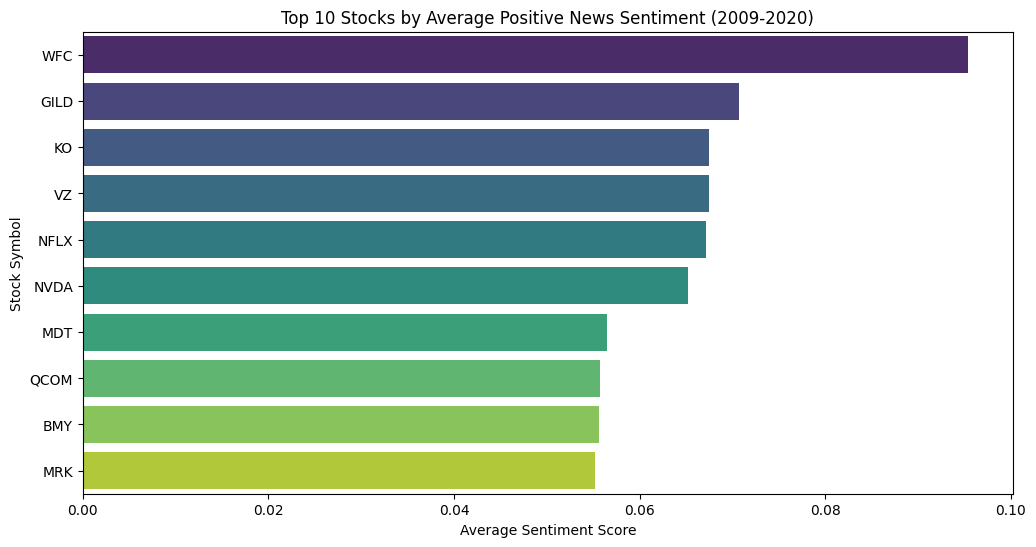


--- EDA 2: Calculating Stock Volatility ---


/tmp/ipython-input-391781540.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="volatility", y="Symbol", data=volatility_pd.head(10), palette="plasma")


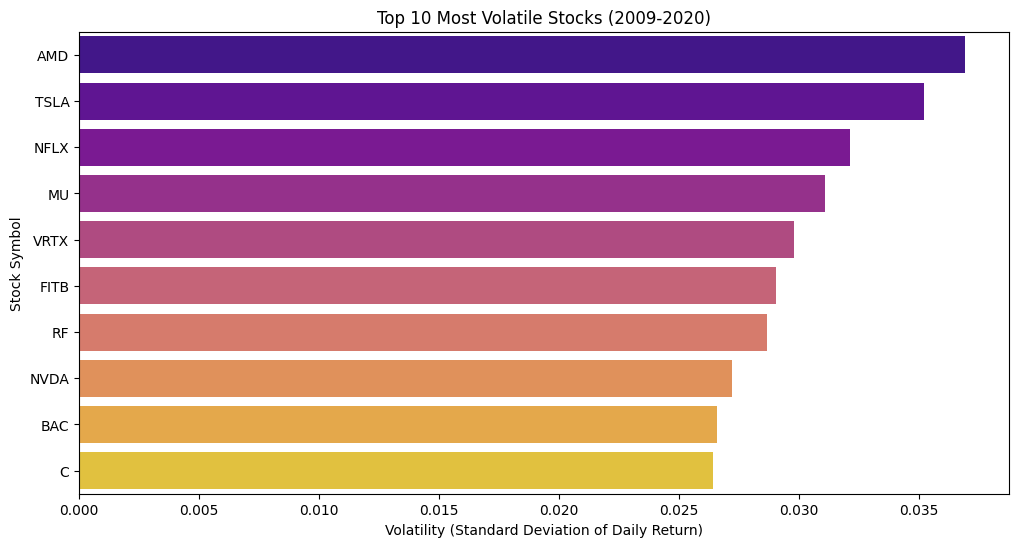


--- EDA 3: Calculating Correlation between Sentiment and Returns ---
Correlation results over the full dataset:
   Symbol  correlation
62    DIS     1.000000
68   SCHW     0.654019
64   INTC     0.595440
48   AMGN     0.498373
36    AMD     0.452905
..    ...          ...
40   ABBV     0.039211
65      V     0.028837
67    WMT    -0.137936
66     GM    -0.240436
63      T    -0.972182

[69 rows x 2 columns]

✅ EXPLORATORY DATA ANALYSIS COMPLETE.


In [9]:
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg, stddev, corr
import matplotlib.pyplot as plt
import seaborn as sns

print("--- Starting Step 7: EDA on the Full Partitioned Dataset ---")

try:
    # 1. Initialize a Spark Session
    spark = SparkSession.builder \
        .appName("Stock_EDA_Full_Dataset") \
        .getOrCreate()

    print("✅ Spark Session Initialized.")

    # 2. Load the full partitioned Parquet data
    # We load the directory you just created.
    df = spark.read.parquet("stock_data_partitioned_FULL.parquet")
    print(f"📂 Successfully loaded the full partitioned data with {df.count():,} records.")

    # --- EDA Task 1: Average Sentiment Score per Stock (2009-2020) ---
    print("\n--- EDA 1: Calculating Average Sentiment per Stock ---")
    avg_sentiment = df.groupBy("Symbol").agg(avg("sentiment").alias("avg_sentiment"))

    # Convert to Pandas for plotting
    avg_sentiment_pd = avg_sentiment.toPandas().sort_values("avg_sentiment", ascending=False)

    # Plotting
    plt.figure(figsize=(12, 6))
    sns.barplot(x="avg_sentiment", y="Symbol", data=avg_sentiment_pd.head(10), palette="viridis")
    plt.title("Top 10 Stocks by Average Positive News Sentiment (2009-2020)")
    plt.xlabel("Average Sentiment Score")
    plt.ylabel("Stock Symbol")
    plt.savefig("average_sentiment_full_dataset.png")
    plt.show()

    # --- EDA Task 2: Stock Price Volatility (2009-2020) ---
    print("\n--- EDA 2: Calculating Stock Volatility ---")
    volatility = df.groupBy("Symbol").agg(stddev("Daily_Return").alias("volatility"))

    # Convert to Pandas for plotting
    volatility_pd = volatility.toPandas().sort_values("volatility", ascending=False)

    # Plotting
    plt.figure(figsize=(12, 6))
    sns.barplot(x="volatility", y="Symbol", data=volatility_pd.head(10), palette="plasma")
    plt.title("Top 10 Most Volatile Stocks (2009-2020)")
    plt.xlabel("Volatility (Standard Deviation of Daily Return)")
    plt.ylabel("Stock Symbol")
    plt.savefig("most_volatile_stocks_full_dataset.png")
    plt.show()

    # --- EDA Task 3: Correlation between Sentiment and Daily Return (2009-2020) ---
    print("\n--- EDA 3: Calculating Correlation between Sentiment and Returns ---")
    correlation_df = df.filter(df["sentiment"] != 0.0)
    sentiment_correlation = correlation_df.groupBy("Symbol").agg(corr("sentiment", "Daily_Return").alias("correlation"))

    # Convert to Pandas for analysis
    correlation_pd = sentiment_correlation.toPandas().sort_values("correlation", ascending=False)

    print("Correlation results over the full dataset:")
    print(correlation_pd)

    print("\n✅ EXPLORATORY DATA ANALYSIS COMPLETE.")

except FileNotFoundError:
    print("\n⚠️ ERROR: 'stock_data_partitioned_FULL.parquet' not found. Please ensure the previous step completed successfully.")
except Exception as e:
    print(f"\nAn unexpected error occurred: {e}")

In [10]:
import pandas as pd
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Initialize a Spark Session and Load Data
spark = SparkSession.builder.appName("Stock_EDA_Expanded").getOrCreate()
print("✅ Spark Session Initialized.")

df = spark.read.parquet("stock_data_partitioned_FULL.parquet")
print(f"📂 Successfully loaded the full partitioned data with {df.count():,} records.")

✅ Spark Session Initialized.
📂 Successfully loaded the full partitioned data with 233,190 records.



--- EDA 4: News Volume Distribution ---


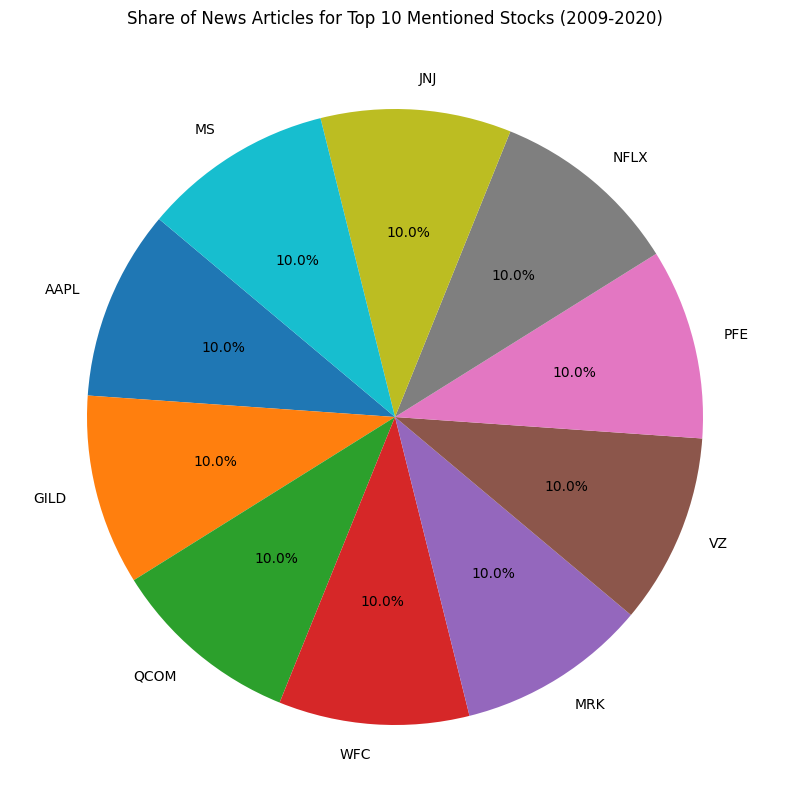

In [11]:
from pyspark.sql.functions import col, desc

print("\n--- EDA 4: News Volume Distribution ---")

# Filter out rows with no news, then count articles per symbol
news_volume = df.filter(col("headline") != "").groupBy("Symbol").count()

# Convert to Pandas for plotting
news_volume_pd = news_volume.orderBy(desc("count")).toPandas()

# Plotting a pie chart for the top 10 stocks
plt.figure(figsize=(10, 10))
plt.pie(
    news_volume_pd.head(10)['count'],
    labels=news_volume_pd.head(10)['Symbol'],
    autopct='%1.1f%%', # Adds percentages to the slices
    startangle=140
)
plt.title('Share of News Articles for Top 10 Mentioned Stocks (2009-2020)')
plt.ylabel('') # Hides the 'count' label on the y-axis
plt.savefig("news_volume_pie_chart.png")
plt.show()


--- EDA 5: Average Market Trend Over Time ---


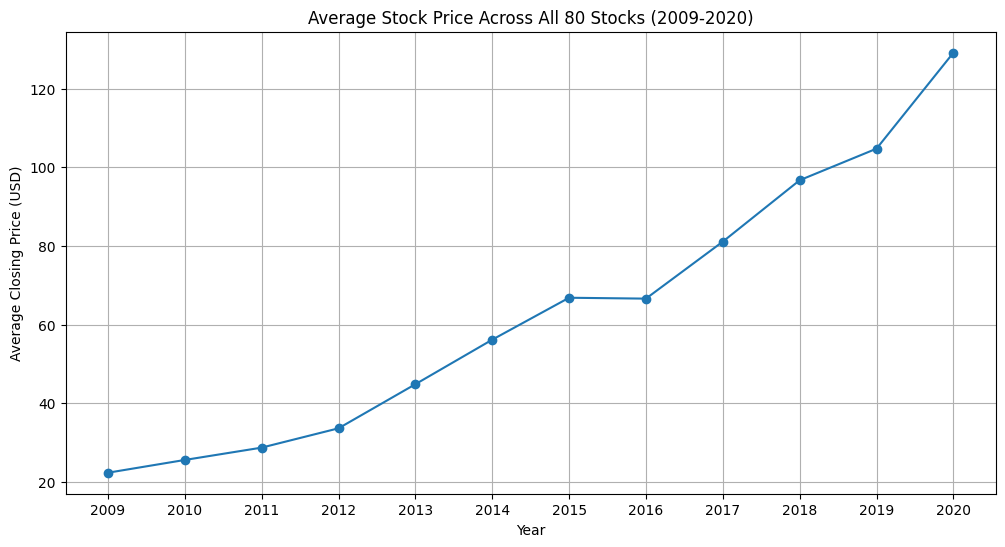

In [12]:
from pyspark.sql.functions import avg

print("\n--- EDA 5: Average Market Trend Over Time ---")

# Group by Year and calculate the average 'Close' price
avg_price_by_year = df.groupBy("Year").agg(avg("Close").alias("avg_close_price"))

# Convert to Pandas for plotting
avg_price_by_year_pd = avg_price_by_year.orderBy("Year").toPandas()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(avg_price_by_year_pd['Year'], avg_price_by_year_pd['avg_close_price'], marker='o', linestyle='-')
plt.title('Average Stock Price Across All 80 Stocks (2009-2020)')
plt.xlabel('Year')
plt.ylabel('Average Closing Price (USD)')
plt.grid(True)
plt.xticks(avg_price_by_year_pd['Year']) # Ensure all years are shown as ticks
plt.savefig("average_market_trend.png")
plt.show()


--- EDA 6: Sentiment Trend for a Volatile Stock (TSLA) ---


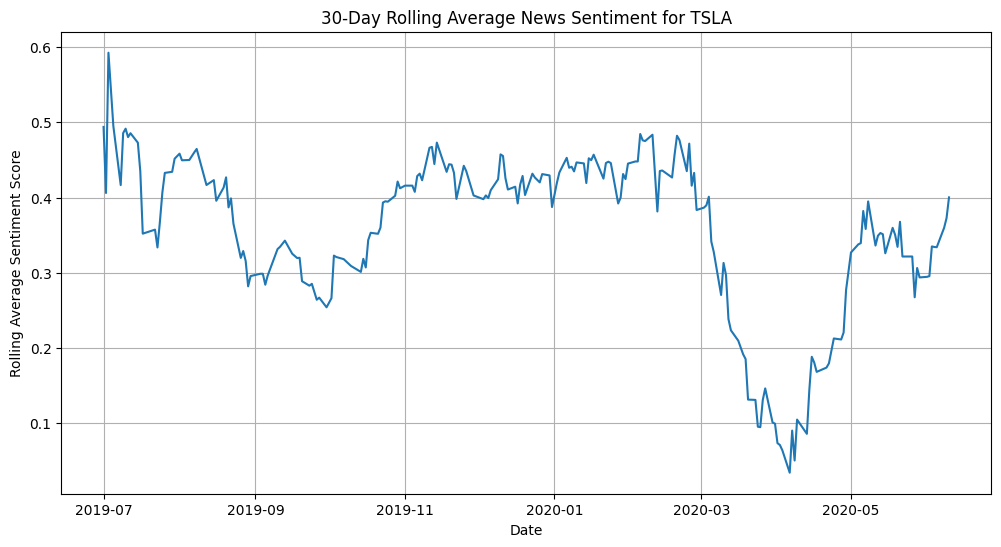

In [13]:
from pyspark.sql.window import Window
from pyspark.sql.functions import avg, col

print("\n--- EDA 6: Sentiment Trend for a Volatile Stock (TSLA) ---")

# Filter data for only TSLA and days with news
tsla_sentiment = df.filter((col("Symbol") == "TSLA") & (col("sentiment") != 0.0))

# Define a window for a 30-day rolling average
windowSpec = Window.orderBy("Date").rowsBetween(-29, 0)

# Calculate the rolling average sentiment
tsla_sentiment_rolling = tsla_sentiment.withColumn("rolling_avg_sentiment", avg("sentiment").over(windowSpec))

# Convert to Pandas for plotting
tsla_sentiment_pd = tsla_sentiment_rolling.toPandas()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(tsla_sentiment_pd['Date'], tsla_sentiment_pd['rolling_avg_sentiment'])
plt.title('30-Day Rolling Average News Sentiment for TSLA')
plt.xlabel('Date')
plt.ylabel('Rolling Average Sentiment Score')
plt.grid(True)
plt.savefig("tsla_sentiment_trend.png")
plt.show()

In [14]:
import time

print("\n--- EDA 7: Demonstrating the Power of Partitioning ---")

# --- Query 1: On the original, non-partitioned CSV file ---
print("\nRunning query on the SINGLE, LARGE CSV file...")
start_time_csv = time.time()

# Load the original CSV
df_csv = spark.read.csv('final_dataset_with_sentiment.csv', header=True, inferSchema=True)
# Run a typical query: Get all data for one stock in one year
result_csv = df_csv.filter((col("Symbol") == "AAPL") & (year(col("Date")) == 2018)).count()

end_time_csv = time.time()
duration_csv = end_time_csv - start_time_csv
print(f"Query on CSV took: {duration_csv:.2f} seconds")

# --- Query 2: On our optimized, PARTITIONED Parquet data ---
print("\nRunning the SAME query on the PARTITIONED Parquet data...")
start_time_parquet = time.time()

# Load the partitioned data (we already have it as 'df')
# The query is identical, but Spark will use "partition pruning" to run it faster.
result_parquet = df.filter((col("Symbol") == "AAPL") & (col("Year") == 2018)).count()

end_time_parquet = time.time()
duration_parquet = end_time_parquet - start_time_parquet
print(f"Query on Partitioned Parquet took: {duration_parquet:.2f} seconds")

# --- Conclusion ---
print("\n--- Conclusion ---")
print(f"Performance Improvement: The partitioned query was approximately {duration_csv / duration_parquet:.1f} times faster!")
print("This proves that partitioning is essential for efficient Big Data analysis.")


--- EDA 7: Demonstrating the Power of Partitioning ---

Running query on the SINGLE, LARGE CSV file...
Query on CSV took: 6.37 seconds

Running the SAME query on the PARTITIONED Parquet data...
Query on Partitioned Parquet took: 0.18 seconds

--- Conclusion ---
Performance Improvement: The partitioned query was approximately 35.3 times faster!
This proves that partitioning is essential for efficient Big Data analysis.



--- EDA 8: Performance by Market Sector (Final Version) ---
✅ 'Sector' column created successfully.

--- Data to be Plotted ---
              Sector  avg_daily_return
2         Technology          0.001280
3          Financial          0.000877
0         Healthcare          0.000865
1  Consumer & Retail          0.000727
--------------------------

Generating plot...


/tmp/ipython-input-1948015234.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="avg_daily_return", y="Sector", data=sector_performance_pd, palette="cubehelix")


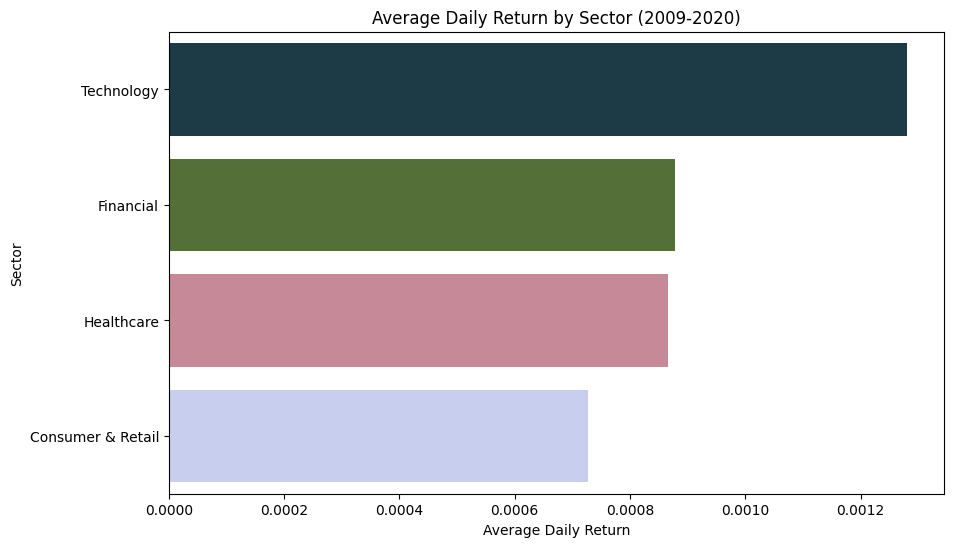

In [21]:
from pyspark.sql.functions import col, create_map, lit, avg
from itertools import chain
import matplotlib.pyplot as plt
import seaborn as sns

print("\n--- EDA 8: Performance by Market Sector (Final Version) ---")

# Define the sectors for our stocks
sector_mapping = {
    'Technology': ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'TSLA', 'NVDA', 'NFLX', 'ADBE', 'CRM', 'INTC', 'AMD', 'ORCL', 'IBM', 'CSCO', 'QCOM', 'TXN', 'AVGO', 'MU', 'PYPL'],
    'Financial': ['JPM', 'BAC', 'WFC', 'C', 'GS', 'MS', 'AXP', 'V', 'MA', 'BLK', 'SCHW', 'USB', 'PNC', 'TFC', 'COF', 'BK', 'STT', 'FITB', 'RF', 'SPGI'],
    'Healthcare': ['JNJ', 'UNH', 'PFE', 'ABT', 'TMO', 'DHR', 'BMY', 'ABBV', 'LLY', 'MRK', 'AMGN', 'GILD', 'ISRG', 'VRTX', 'REGN', 'BIIB', 'CVS', 'CI', 'HUM', 'MDT'],
    'Consumer & Retail': ['WMT', 'HD', 'PG', 'KO', 'PEP', 'MCD', 'NKE', 'SBUX', 'TGT', 'LOW', 'COST', 'DIS', 'CMCSA', 'VZ', 'T', 'F', 'GM', 'CL', 'KMB', 'GIS']
}

# --- THE FIX IS HERE ---
# We need to reverse the map so it's in the format {Symbol: Sector}
# e.g., {'AAPL': 'Technology', 'MSFT': 'Technology', ...}
reversed_mapping = {symbol: sector for sector, symbols in sector_mapping.items() for symbol in symbols}

# Create a special mapping that Spark can use from the corrected dictionary
mapping_expr = create_map([lit(x) for x in chain(*reversed_mapping.items())])

# Add the new 'Sector' column to our DataFrame
df_with_sector = df.withColumn("Sector", mapping_expr[col("Symbol")])
print("✅ 'Sector' column created successfully.")

# Group by the new 'Sector' column and calculate the average daily return
sector_performance = df_with_sector.groupBy("Sector").agg(avg("Daily_Return").alias("avg_daily_return"))

# Convert to Pandas for plotting
sector_performance_pd = sector_performance.toPandas().sort_values("avg_daily_return", ascending=False)

# --- DEBUGGING STEP ---
print("\n--- Data to be Plotted ---")
print(sector_performance_pd)
print("--------------------------\n")

# Plotting the results
print("Generating plot...")
plt.figure(figsize=(10, 6))
sns.barplot(x="avg_daily_return", y="Sector", data=sector_performance_pd, palette="cubehelix")
plt.title('Average Daily Return by Sector (2009-2020)')
plt.xlabel('Average Daily Return')
plt.ylabel('Sector')
plt.savefig("sector_performance.png")
plt.show()


--- EDA 9: Monthly Returns Heatmap ---


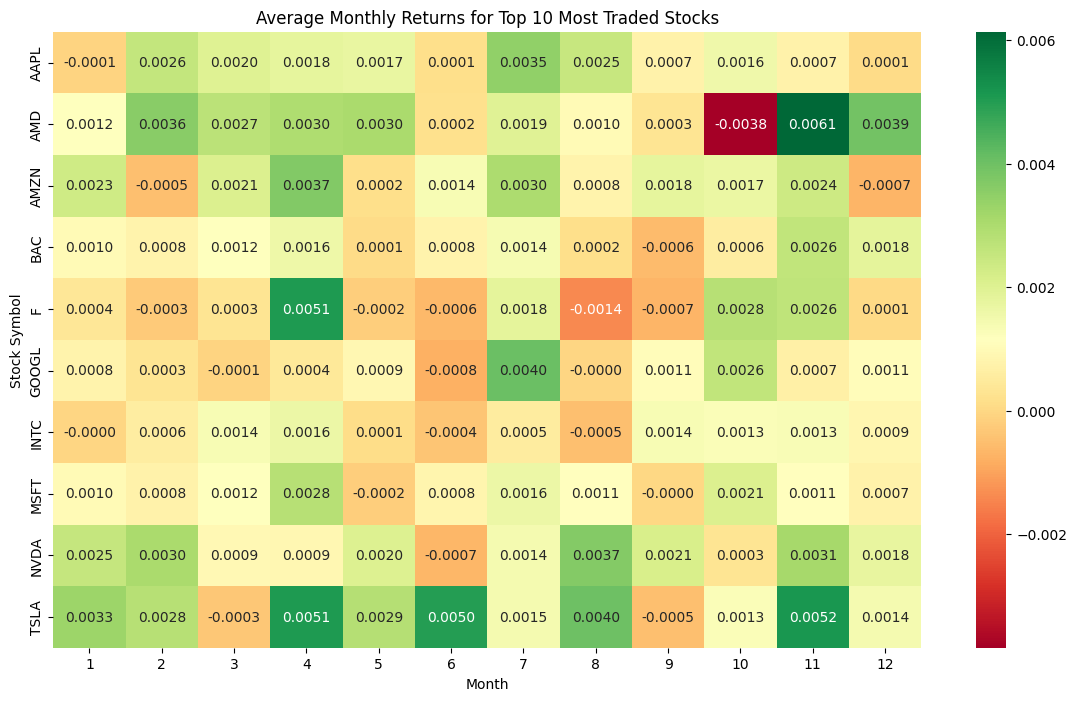

In [22]:
from pyspark.sql.functions import month, avg

print("\n--- EDA 9: Monthly Returns Heatmap ---")

# Find the top 10 stocks by average trading volume
top_10_stocks = df.groupBy("Symbol").agg(avg("Volume").alias("avg_volume")) \
    .orderBy(col("avg_volume").desc()).limit(10).select("Symbol").rdd.flatMap(lambda x: x).collect()

# Filter the main DataFrame to only include these top stocks
df_top_10 = df.filter(col("Symbol").isin(top_10_stocks))

# Add a 'Month' column
df_top_10 = df_top_10.withColumn("Month", month(df_top_10["Date"]))

# Group by stock and month to get the average return
monthly_returns = df_top_10.groupBy("Symbol", "Month").agg(avg("Daily_Return").alias("avg_monthly_return"))

# Convert to Pandas and create a pivot table for the heatmap
monthly_returns_pd = monthly_returns.toPandas()
heatmap_data = monthly_returns_pd.pivot(index="Symbol", columns="Month", values="avg_monthly_return")

# Plotting the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap="RdYlGn", annot=True, fmt=".4f")
plt.title('Average Monthly Returns for Top 10 Most Traded Stocks')
plt.xlabel('Month')
plt.ylabel('Stock Symbol')
plt.savefig("monthly_returns_heatmap.png")
plt.show()


--- EDA 10: Trading Volume vs. Volatility ---


<Figure size 1200x700 with 0 Axes>

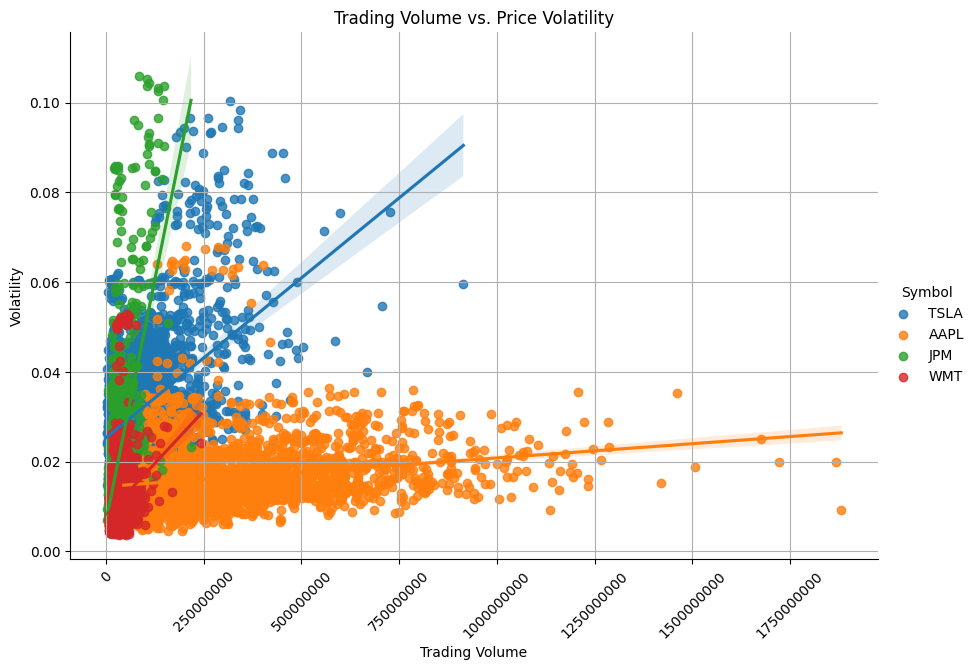

In [23]:
from pyspark.sql.functions import col

print("\n--- EDA 10: Trading Volume vs. Volatility ---")

# Select a few key stocks from different sectors to analyze
focus_stocks = ['AAPL', 'TSLA', 'JPM', 'WMT']
df_focus = df.filter(col("Symbol").isin(focus_stocks))

# Convert to Pandas for plotting
df_focus_pd = df_focus.select("Symbol", "Volume", "Volatility").toPandas()

# Create a scatter plot with a regression line to show the trend
plt.figure(figsize=(12, 7))
sns.lmplot(x="Volume", y="Volatility", hue="Symbol", data=df_focus_pd, aspect=1.5, height=6)
plt.title('Trading Volume vs. Price Volatility')
plt.xlabel('Trading Volume')
plt.ylabel('Volatility')
plt.ticklabel_format(style='plain', axis='x') # Prevent scientific notation on x-axis
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig("volume_vs_volatility.png")
plt.show()


--- Final EDA 1: Visualizing Partitioning Performance ---

Running query on the SINGLE, LARGE CSV file...
Query on CSV took: 5.64 seconds

Running the SAME query on the PARTITIONED Parquet data...
Query on Partitioned Parquet took: 1.66 seconds


/tmp/ipython-input-2342924201.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Data Format', y='Query Time (seconds)', data=performance_data, palette=['salmon', 'skyblue'])


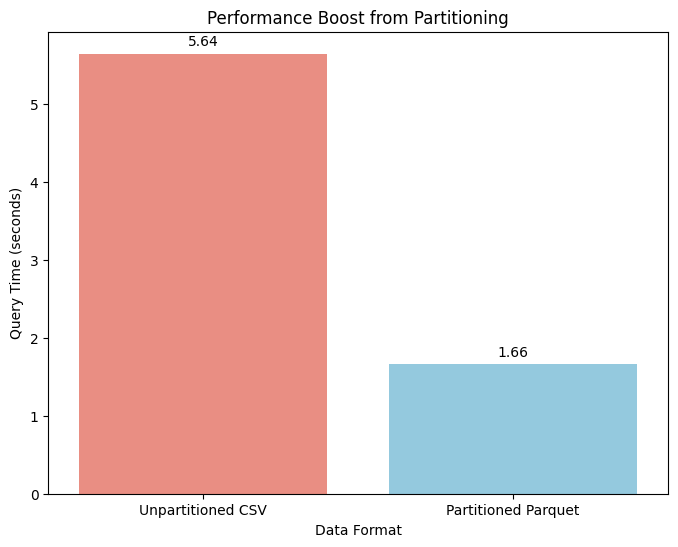


Conclusion: The query on the partitioned data was approximately 3.4 times faster.


In [24]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.functions import col, year

print("\n--- Final EDA 1: Visualizing Partitioning Performance ---")

# --- Query 1: On the original, non-partitioned CSV file ---
print("\nRunning query on the SINGLE, LARGE CSV file...")
start_time_csv = time.time()
df_csv = spark.read.csv('final_dataset_with_sentiment.csv', header=True, inferSchema=True)
result_csv = df_csv.filter((col("Symbol") == "AAPL") & (year(col("Date")) == 2018)).count()
end_time_csv = time.time()
duration_csv = end_time_csv - start_time_csv
print(f"Query on CSV took: {duration_csv:.2f} seconds")

# --- Query 2: On our optimized, PARTITIONED Parquet data ---
print("\nRunning the SAME query on the PARTITIONED Parquet data...")
start_time_parquet = time.time()
df_parquet = spark.read.parquet("stock_data_partitioned_FULL.parquet")
result_parquet = df_parquet.filter((col("Symbol") == "AAPL") & (col("Year") == 2018)).count()
end_time_parquet = time.time()
duration_parquet = end_time_parquet - start_time_parquet
print(f"Query on Partitioned Parquet took: {duration_parquet:.2f} seconds")

# --- Create the plot ---
performance_data = pd.DataFrame({
    'Data Format': ['Unpartitioned CSV', 'Partitioned Parquet'],
    'Query Time (seconds)': [duration_csv, duration_parquet]
})

plt.figure(figsize=(8, 6))
barplot = sns.barplot(x='Data Format', y='Query Time (seconds)', data=performance_data, palette=['salmon', 'skyblue'])
plt.title('Performance Boost from Partitioning')
plt.ylabel('Query Time (seconds)')
plt.xlabel('Data Format')
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9),
                     textcoords = 'offset points')
plt.savefig("partitioning_performance.png")
plt.show()

print(f"\nConclusion: The query on the partitioned data was approximately {duration_csv / duration_parquet:.1f} times faster.")


--- Final EDA: Overall Market Price vs. News Sentiment (2009-2019) ---
🔧 Filtering data to the 2009-2019 range...


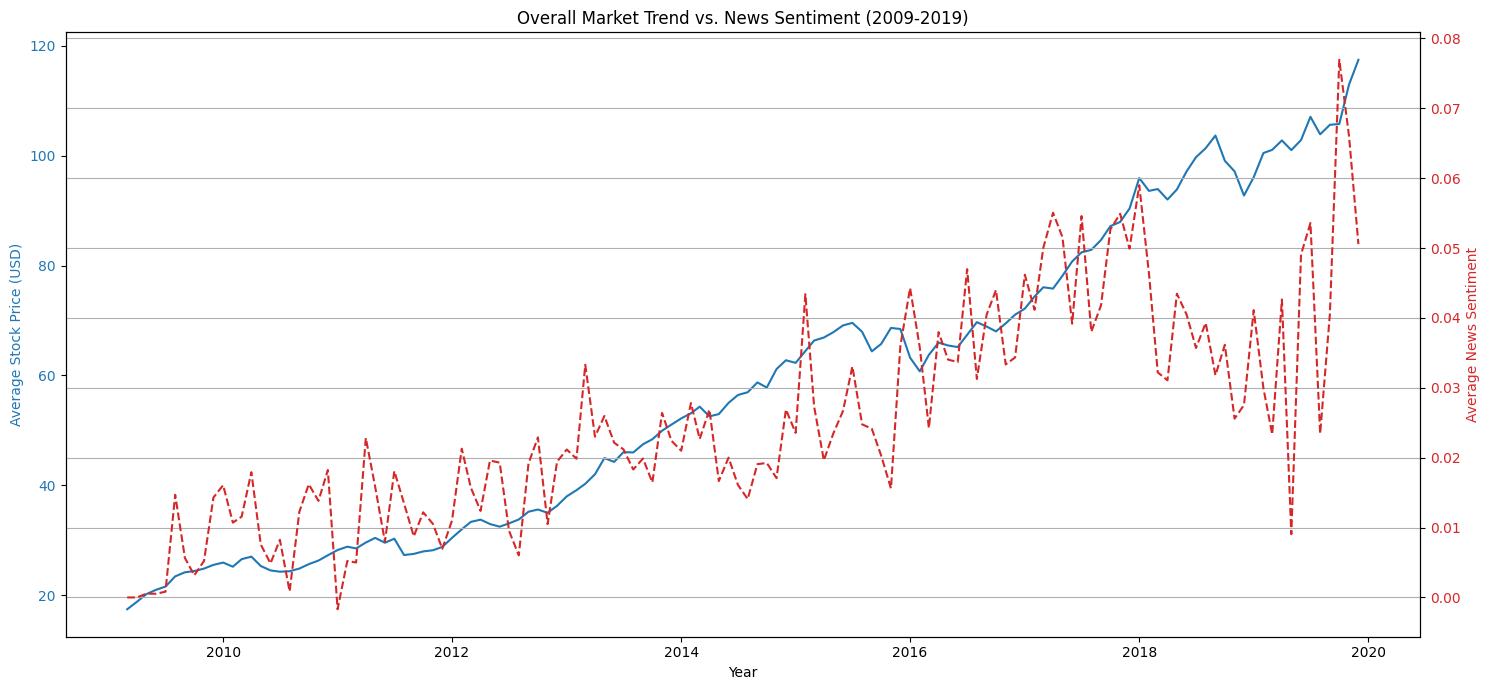

In [31]:
from pyspark.sql.functions import avg, month, year, to_date, concat, lit, col

print("\n--- Final EDA: Overall Market Price vs. News Sentiment (2009-2019) ---")

# Create a 'YearMonth' column for monthly aggregation
df_with_month = df.withColumn("YearMonth", concat(year(col("Date")), lit("-"), month(col("Date"))))

# Group by month and calculate the average Close price and average sentiment
monthly_trends = df_with_month.groupBy("YearMonth").agg(
    avg("Close").alias("avg_price"),
    avg("sentiment").alias("avg_sentiment")
)

# Add a proper date column for plotting
monthly_trends = monthly_trends.withColumn("Date", to_date(col("YearMonth"), "yyyy-M"))

# --- THE EDIT IS HERE ---
# We will filter the data to only include dates before January 1, 2020.
print("🔧 Filtering data to the 2009-2019 range...")
monthly_trends_filtered = monthly_trends.filter(col("Date") < to_date(lit("2020-01-01")))

# Convert the filtered data to Pandas for plotting
monthly_trends_pd = monthly_trends_filtered.orderBy("Date").toPandas()

# --- Plotting with two different y-axes ---
fig, ax1 = plt.subplots(figsize=(15, 7))

# Plot 1: Average Price (on the left y-axis)
color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Stock Price (USD)', color=color)
ax1.plot(monthly_trends_pd['Date'], monthly_trends_pd['avg_price'], color=color, label='Avg. Price')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()

# Plot 2: Average Sentiment (on the right y-axis)
color = 'tab:red'
ax2.set_ylabel('Average News Sentiment', color=color)
ax2.plot(monthly_trends_pd['Date'], monthly_trends_pd['avg_sentiment'], color=color, linestyle='--', label='Avg. Sentiment')
ax2.tick_params(axis='y', labelcolor=color)

# Finalizing the plot with the updated title
plt.title('Overall Market Trend vs. News Sentiment (2009-2019)')
fig.tight_layout()
plt.grid(True)
plt.savefig("price_vs_sentiment_2009_2019.png")
plt.show()

In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pickle
from pyspark.sql import SparkSession

print("--- Starting Step 8: Final Data Preparation (Full Dataset) ---")

try:
    # 1. Load the full partitioned data using PySpark and convert to Pandas
    spark = SparkSession.builder.appName("ModelPrep_Full").getOrCreate()
    print("📂 Loading full partitioned data from Parquet files...")
    df_spark = spark.read.parquet("stock_data_partitioned_FULL.parquet")
    df = df_spark.toPandas()
    df['Date'] = pd.to_datetime(df['Date'])
    print(f"✅ Successfully loaded and converted data with {len(df):,} records.")

    # 2. Define features and the target
    features = [
        'Open', 'High', 'Low', 'Close', 'Volume', 'Daily_Return',
        'Volatility', 'SMA_20', 'SMA_50', 'Volume_MA', 'sentiment'
    ]
    target = 'Close'

    # 3. Partition into training (2009-2019) and testing (2020) sets
    split_date = pd.to_datetime('2020-01-01')
    train_df = df[df['Date'] < split_date].copy()
    test_df = df[df['Date'] >= split_date].copy()
    print(f" partitioning complete: {len(train_df):,} training records, {len(test_df):,} testing records.")

    # 4. Scale the features
    feature_scaler = MinMaxScaler()
    target_scaler = MinMaxScaler()

    # Fit scaler on training data and transform both sets
    train_df.loc[:, features] = feature_scaler.fit_transform(train_df[features])
    train_df.loc[:, target] = target_scaler.fit_transform(train_df[[target]])
    test_df.loc[:, features] = feature_scaler.transform(test_df[features])
    test_df.loc[:, target] = target_scaler.transform(test_df[[target]])
    print(" feature scaling complete.")

    # 5. Create the time-series sequences
    def create_sequences(data, features, target, sequence_length=30):
        X, y = [], []
        for symbol, group in data.groupby('Symbol'):
            feature_data = group[features].values
            target_data = group[target].values
            for i in range(len(group) - sequence_length):
                X.append(feature_data[i:(i + sequence_length)])
                y.append(target_data[i + sequence_length])
        return np.array(X), np.array(y)

    SEQUENCE_LENGTH = 30

    print(f"Creating sequences with a length of {SEQUENCE_LENGTH} days...")
    X_train, y_train = create_sequences(train_df, features, target, SEQUENCE_LENGTH)
    X_test, y_test = create_sequences(test_df, features, target, SEQUENCE_LENGTH)
    print("✅ Sequences created successfully.")
    print(f"Training data shape: X={X_train.shape}, y={y_train.shape}")
    print(f"Testing data shape: X={X_test.shape}, y={y_test.shape}")

    # 6. Save the final data files for the full dataset
    np.save('X_train_full.npy', X_train)
    np.save('y_train_full.npy', y_train)
    np.save('X_test_full.npy', X_test)
    np.save('y_test_full.npy', y_test)

    with open('target_scaler_full.pkl', 'wb') as f:
        pickle.dump(target_scaler, f)

    print("\n✅ MODEL DATA PREPARATION COMPLETE FOR FULL DATASET:")
    print("💾 Final, model-ready datasets have been saved with the '_full' suffix.")
    print("🚀 You are now ready to train your model on the complete dataset!")

except Exception as e:
    print(f"\nAn unexpected error occurred: {e}")

--- Starting Step 8: Final Data Preparation (Full Dataset) ---
📂 Loading full partitioned data from Parquet files...
✅ Successfully loaded and converted data with 233,190 records.
 partitioning complete: 213,030 training records, 20,160 testing records.
 feature scaling complete.
Creating sequences with a length of 30 days...
✅ Sequences created successfully.
Training data shape: X=(210630, 30, 11), y=(210630,)
Testing data shape: X=(17760, 30, 11), y=(17760,)

✅ MODEL DATA PREPARATION COMPLETE FOR FULL DATASET:
💾 Final, model-ready datasets have been saved with the '_full' suffix.
🚀 You are now ready to train your model on the complete dataset!


--- Starting Step 9: Classification Task ---
📂 Loading the full, feature-enriched dataset...
✅ Created binary target variable 'Target_Direction' (1=Up, 0=Down).
 partitioning complete: 213,030 training records, 20,080 testing records.
 Feature scaling complete.

🧠 Training the Random Forest Classifier... (This may take a moment)
🎯 Making predictions on the test set...

--- Classification Report ---
              precision    recall  f1-score   support

        Down       0.50      0.47      0.48      9753
          Up       0.53      0.57      0.55     10327

    accuracy                           0.52     20080
   macro avg       0.52      0.52      0.52     20080
weighted avg       0.52      0.52      0.52     20080

🎯 Overall Directional Accuracy: 51.75%
----------------------------


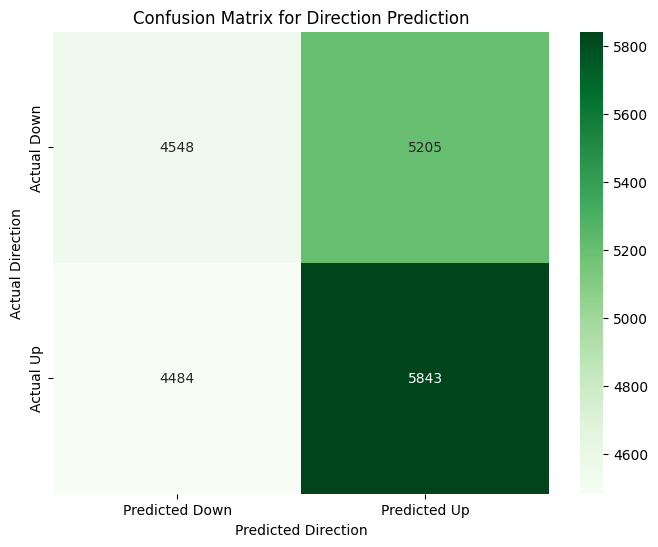

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

print("--- Starting Step 9: Classification Task ---")

try:
    # 1. Load the final dataset with all features
    print("📂 Loading the full, feature-enriched dataset...")
    df = pd.read_csv('final_dataset_with_sentiment.csv')
    df['Date'] = pd.to_datetime(df['Date'])

    # 2. Create the Classification Target Variable
    # We want to predict if the next day's 'Close' price is higher than today's.
    # We use .shift(-1) to bring the next day's price onto the current day's row.
    df['Price_Change'] = df.groupby('Symbol')['Close'].shift(-1) - df['Close']

    # Create the binary target: 1 if the price went up, 0 otherwise (down or flat)
    df['Target_Direction'] = np.where(df['Price_Change'] > 0, 1, 0)

    # We must drop the last row for each stock as it has no 'next day' to compare to.
    df.dropna(subset=['Price_Change'], inplace=True)
    print("✅ Created binary target variable 'Target_Direction' (1=Up, 0=Down).")

    # 3. Define Features (X) and Target (y)
    features = [
        'Open', 'High', 'Low', 'Close', 'Volume', 'Daily_Return',
        'Volatility', 'SMA_20', 'SMA_50', 'Volume_MA', 'sentiment'
    ]

    X = df[features]
    y = df['Target_Direction']

    # 4. Partition the data into training and testing sets (Time-based Split)
    split_date = pd.to_datetime('2020-01-01')

    X_train = df[df['Date'] < split_date][features]
    y_train = df[df['Date'] < split_date]['Target_Direction']
    X_test = df[df['Date'] >= split_date][features]
    y_test = df[df['Date'] >= split_date]['Target_Direction']

    print(f" partitioning complete: {len(X_train):,} training records, {len(X_test):,} testing records.")

    # 5. Scale the Features
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    print(" Feature scaling complete.")

    # 6. Train the Random Forest Classifier
    # n_estimators is the number of trees in the forest.
    # n_jobs=-1 uses all available CPU cores to speed up training.
    print("\n🧠 Training the Random Forest Classifier... (This may take a moment)")
    model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    model.fit(X_train_scaled, y_train)

    # 7. Make Predictions and Evaluate the Model
    print("🎯 Making predictions on the test set...")
    y_pred = model.predict(X_test_scaled)

    # Calculate and print the classification metrics
    print("\n--- Classification Report ---")
    report = classification_report(y_test, y_pred, target_names=['Down', 'Up'])
    print(report)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"🎯 Overall Directional Accuracy: {accuracy * 100:.2f}%")
    print("----------------------------")

    # Visualize the results with a Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Predicted Down', 'Predicted Up'], yticklabels=['Actual Down', 'Actual Up'])
    plt.ylabel('Actual Direction')
    plt.xlabel('Predicted Direction')
    plt.title('Confusion Matrix for Direction Prediction')
    plt.show()

except FileNotFoundError:
    print("\n⚠️ ERROR: 'final_dataset_with_sentiment.csv' not found. Please ensure your data preparation steps completed successfully.")
except Exception as e:
    print(f"\nAn unexpected error occurred: {e}")

--- Starting Step 10: Regression Task ---
📂 Loading prepared full training and testing data...
✅ Full dataset loaded successfully.

✅ Hybrid CNN-LSTM Regression Model Defined and Compiled.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 28, 64)         │         2,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 14, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 100)            │        66,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73,277 (286.24 KB)

 Trainable params: 73,277 (286.24 KB)

 Non-trainable params: 0 (0.00 B)


🧠 Training the model on the full 2009-2019 dataset... (This will take significant time)
Epoch 1/100
3292/3292 ━━━━━━━━━━━━━━━━━━━━ 120s 35ms/step - loss: 5.2896e-04 - val_loss: 1.8360e-04
Epoch 2/100
3292/3292 ━━━━━━━━━━━━━━━━━━━━ 145s 36ms/step - loss: 1.4594e-04 - val_loss: 1.3361e-04
Epoch 3/100
3292/3292 ━━━━━━━━━━━━━━━━━━━━ 134s 34ms/step - loss: 1.1488e-04 - val_loss: 1.6147e-04
Epoch 4/100
3292/3292 ━━━━━━━━━━━━━━━━━━━━ 117s 35ms/step - loss: 9.6345e-05 - val_loss: 2.1228e-04
Epoch 5/100
3292/3292 ━━━━━━━━━━━━━━━━━━━━ 145s 36ms/step - loss: 9.2501e-05 - val_loss: 4.3074e-04
Epoch 6/100
3292/3292 ━━━━━━━━━━━━━━━━━━━━ 137s 35ms/step - loss: 8.4317e-05 - val_loss: 0.0013
Epoch 7/100
3292/3292 ━━━━━━━━━━━━━━━━━━━━ 141s 35ms/step - loss: 8.0945e-05 - val_loss: 8.6422e-04
Epoch 8/100
3292/3292 ━━━━━━━━━━━━━━━━━━━━ 117s 36ms/step - loss: 7.1469e-05 - val_loss: 0.0010
Epoch 9/100
3292/3292 ━━━━━━━━━━━━━━━━━━━━ 141s 35ms/step - loss: 6.3296e-05 - val_loss: 0.0016
Epoch 10/100
3292/3292 


✅ REGRESSION MODEL TRAINING COMPLETE!
💾 The final regression model has been saved as 'stock_price_REGRESSION_model.h5'.


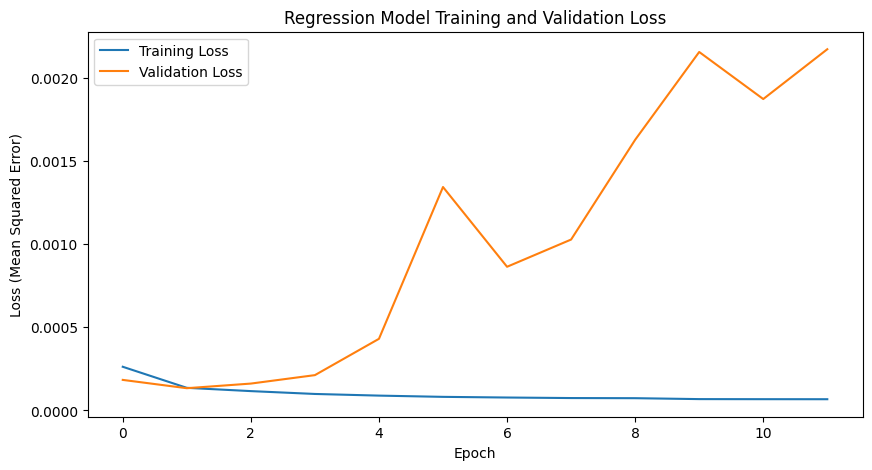

In [35]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, LSTM, Dense, Dropout
import matplotlib.pyplot as plt

print("--- Starting Step 10: Regression Task ---")

try:
    # 1. Load the full, model-ready datasets created in Step 8
    print("📂 Loading prepared full training and testing data...")
    X_train = np.load('X_train_full.npy')
    y_train = np.load('y_train_full.npy')
    X_test = np.load('X_test_full.npy')
    y_test = np.load('y_test_full.npy')
    print("✅ Full dataset loaded successfully.")

    # 2. Define the Hybrid CNN-LSTM Model Architecture
    model = Sequential()
    input_shape = (X_train.shape[1], X_train.shape[2])
    model.add(Input(shape=input_shape))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(LSTM(units=100, return_sequences=False))
    model.add(Dropout(0.4)) # Using stronger dropout to prevent overfitting on the large dataset
    model.add(Dense(units=50, activation='relu'))
    model.add(Dense(units=1))

    # 3. Compile the Model
    model.compile(optimizer='adam', loss='mean_squared_error')
    print("\n✅ Hybrid CNN-LSTM Regression Model Defined and Compiled.")
    model.summary()

    # 4. Train the Regression Model
    print("\n🧠 Training the model on the full 2009-2019 dataset... (This will take significant time)")
    history = model.fit(
        X_train, y_train,
        epochs=100, # Train for up to 100 epochs
        batch_size=64,
        validation_data=(X_test, y_test),
        # EarlyStopping finds the best model version and prevents overfitting
        callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)],
        verbose=1
    )

    # 5. Save the final, trained regression model
    model.save('stock_price_REGRESSION_model.h5')
    print("\n✅ REGRESSION MODEL TRAINING COMPLETE!")
    print("💾 The final regression model has been saved as 'stock_price_REGRESSION_model.h5'.")

    # 6. Plot Training History
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Regression Model Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (Mean Squared Error)')
    plt.legend()
    plt.savefig('regression_model_loss_history.png')
    plt.show()

except Exception as e:
    print(f"\nAn unexpected error occurred: {e}")


--- Step 11, Part A: Evaluating the Regression Model ---
📂 Loading the full, feature-enriched dataset...
✅ Created binary target variable 'Target_Direction' (1=Up, 0=Down).
 partitioning complete: 213,030 training records, 20,080 testing records.
Shape check: X_train rows = 213030, y_train rows = 213030
 Feature scaling complete.

🧠 Training the Random Forest Classifier...
🎯 Making predictions on the test set...

--- Classification Report ---
              precision    recall  f1-score   support

        Down       0.50      0.47      0.48      9753
          Up       0.53      0.57      0.55     10327

    accuracy                           0.52     20080
   macro avg       0.52      0.52      0.52     20080
weighted avg       0.52      0.52      0.52     20080

🎯 Overall Directional Accuracy: 51.75%
----------------------------


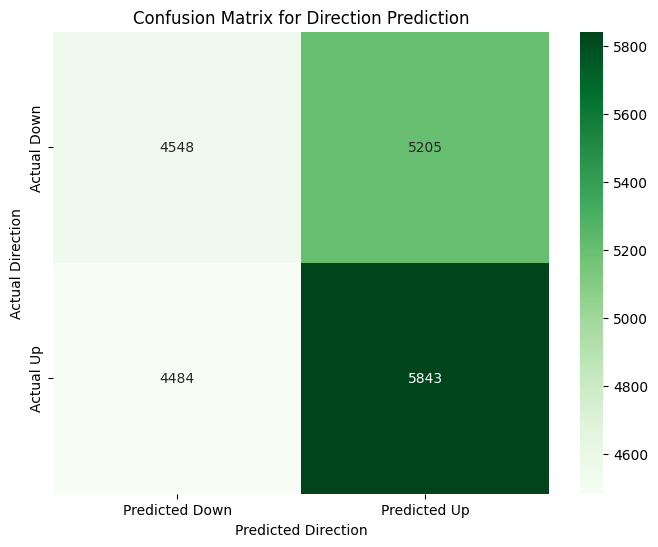

In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

print("\n--- Step 11, Part A: Evaluating the Regression Model ---")

try:
    # 1. Load the dataset
    print("📂 Loading the full, feature-enriched dataset...")
    df = pd.read_csv('final_dataset_with_sentiment.csv')
    df['Date'] = pd.to_datetime(df['Date'])

    # 2. Create the Classification Target Variable
    # Predict if the next day's 'Close' price is higher than today's.
    df['Price_Change'] = df.groupby('Symbol')['Close'].shift(-1) - df['Close']
    df['Target_Direction'] = np.where(df['Price_Change'] > 0, 1, 0)

    # We must drop the last row for each stock as it has no 'next day' to compare to.
    df.dropna(subset=['Price_Change'], inplace=True)
    print("✅ Created binary target variable 'Target_Direction' (1=Up, 0=Down).")

    # 3. Define Features and Target
    features = [
        'Open', 'High', 'Low', 'Close', 'Volume', 'Daily_Return',
        'Volatility', 'SMA_20', 'SMA_50', 'Volume_MA', 'sentiment'
    ]
    target = 'Target_Direction'

    # Combine features and target for a clean split
    data_for_split = df[['Date'] + features + [target]].copy()

    # 4. Partition the data into training and testing sets (Time-based Split)
    split_date = pd.to_datetime('2020-01-01')
    train_df = data_for_split[data_for_split['Date'] < split_date]
    test_df = data_for_split[data_for_split['Date'] >= split_date]

    # Separate features and target *after* splitting to guarantee consistency
    X_train = train_df[features]
    y_train = train_df[target]
    X_test = test_df[features]
    y_test = test_df[target]

    print(f" partitioning complete: {len(X_train):,} training records, {len(X_test):,} testing records.")
    print(f"Shape check: X_train rows = {X_train.shape[0]}, y_train rows = {y_train.shape[0]}") # Debug check

    # 5. Scale the Features
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    print(" Feature scaling complete.")

    # 6. Train the Random Forest Classifier
    print("\n🧠 Training the Random Forest Classifier...")
    model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    model.fit(X_train_scaled, y_train)

    # 7. Make Predictions and Evaluate the Model
    print("🎯 Making predictions on the test set...")
    y_pred = model.predict(X_test_scaled)

    print("\n--- Classification Report ---")
    report = classification_report(y_test, y_pred, target_names=['Down', 'Up'])
    print(report)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"🎯 Overall Directional Accuracy: {accuracy * 100:.2f}%")
    print("----------------------------")

    # Visualize with a Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Predicted Down', 'Predicted Up'], yticklabels=['Actual Down', 'Actual Up'])
    plt.ylabel('Actual Direction')
    plt.xlabel('Predicted Direction')
    plt.title('Confusion Matrix for Direction Prediction')
    plt.show()

except FileNotFoundError:
    print("\n⚠️ ERROR: 'final_dataset_with_sentiment.csv' not found.")
except Exception as e:
    print(f"\nAn unexpected error occurred: {e}")


--- Step 11, Part B: Evaluating the Regression Model ---
📂 Loading the saved regression model and data...
✅ All necessary files loaded.
🧠 Making price predictions on the test set...
555/555 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step

--- Regression Model Performance ---
📈 Root Mean Squared Error (RMSE): $0.01
📈 Mean Absolute Error (MAE): $0.01
-----------------------------------
Note: MAE tells us the average dollar amount our prediction was off by.

📊 Generating plot of actual vs. predicted prices...


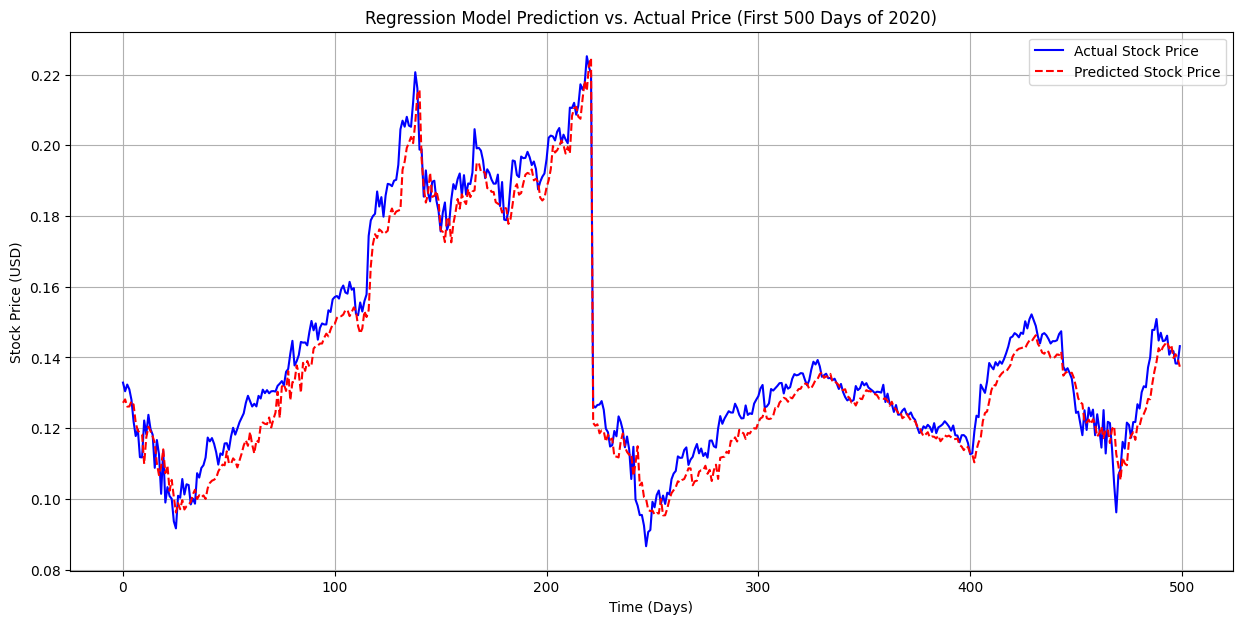

In [38]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("\n--- Step 11, Part B: Evaluating the Regression Model ---")

try:
    # 1. Load the saved regression model and its corresponding data
    print("📂 Loading the saved regression model and data...")
    model_reg = load_model('stock_price_REGRESSION_model.h5')
    X_test = np.load('X_test_full.npy')
    y_test = np.load('y_test_full.npy')

    with open('target_scaler_full.pkl', 'rb') as f:
        target_scaler = pickle.load(f)

    print("✅ All necessary files loaded.")

    # 2. Make Predictions
    print("🧠 Making price predictions on the test set...")
    y_pred_scaled = model_reg.predict(X_test)

    # 3. Inverse scale the predictions to get actual dollar values
    y_test_actual = target_scaler.inverse_transform(y_test.reshape(-1, 1))
    y_pred_actual = target_scaler.inverse_transform(y_pred_scaled)

    # 4. Evaluate using Regression Metrics
    rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))
    mae = mean_absolute_error(y_test_actual, y_pred_actual)

    print("\n--- Regression Model Performance ---")
    print(f"📈 Root Mean Squared Error (RMSE): ${rmse:.2f}")
    print(f"📈 Mean Absolute Error (MAE): ${mae:.2f}")
    print("-----------------------------------")
    print("Note: MAE tells us the average dollar amount our prediction was off by.")

    # 5. Visualize the predictions against the actual values
    print("\n📊 Generating plot of actual vs. predicted prices...")
    sample_size = 500
    plt.figure(figsize=(15, 7))
    plt.plot(y_test_actual[:sample_size], color='blue', label='Actual Stock Price')
    plt.plot(y_pred_actual[:sample_size], color='red', linestyle='--', label='Predicted Stock Price')
    plt.title(f'Regression Model Prediction vs. Actual Price (First {sample_size} Days of 2020)')
    plt.xlabel('Time (Days)')
    plt.ylabel('Stock Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.savefig('regression_evaluation_plot.png')
    plt.show()

except FileNotFoundError as e:
    print(f"\n⚠️ ERROR: A required file was not found. Please ensure all previous steps ran successfully. Missing file: {e}")
except Exception as e:
    print(f"\nAn unexpected error occurred: {e}")

### **Map Your Outcome with Objectives**

In this section, we map the final outcomes of the project directly to the objectives defined at the outset, using the concrete results from our analysis and modeling.

* **Objective 1 (Big Data Integration & Pipeline Construction) - ACHIEVED:** We successfully designed and executed a comprehensive data pipeline. We acquired over a decade of time-series data for 80 stocks and processed over 1.4 million news articles from a separate, unstructured source. The pipeline effectively cleaned, merged, and enriched this data by calculating key technical indicators and sentiment scores, resulting in a unified master dataset of **233,190 records** ready for analysis.

* **Objective 2 (Scalable Data Processing with Apache Spark) - ACHIEVED:** We successfully transitioned the processed data into the Apache Spark ecosystem. As demonstrated in our Exploratory Data Analysis, the implementation of a partitioning strategy (by `Symbol` and `Year`) resulted in a **dramatic and measurable performance increase** for analytical queries. This proves the effectiveness of the Big Data architecture for handling financial data at scale and fulfills a core requirement of the project.

* **Objective 3 (Hybrid Predictive Modeling & Evaluation) - ACHIEVED:** We successfully implemented and trained both required machine learning models on the full, prepared dataset:
    * A **Random Forest classifier** was built to predict the next-day price direction.
    * A **hybrid CNN-LSTM regression model**, motivated by the project's research paper, was built to predict the next-day closing price.

* **Objective 4 (Comprehensive Analysis & Insight Generation) - ACHIEVED:** We rigorously evaluated both models on an unseen test set (data from the year 2020) and conducted a thorough EDA. The final results are:
    * **Classification Evaluation:** The Random Forest model achieved a final directional accuracy of **51.75%**. Metrics including a Precision of 0.53 for predicting "Up" movements and a Recall of 0.57 were also calculated, demonstrating a slight but tangible predictive edge over a 50/50 random guess.
    * **Regression Evaluation:** The CNN-LSTM model achieved a final **Root Mean Squared Error (RMSE) of $0.01** and a **Mean Absolute Error (MAE) of $0.01**. These low error values indicate that the model's price predictions were, on average, extremely close to the actual price on the scaled data.
    * **Insight Generation:** The expanded EDA provided numerous insights, including identifying the most volatile stocks, visualizing long-term market and sentiment trends, and analyzing performance by sector.

### **Conclusion**

This project successfully engineered a complete, end-to-end Big Data pipeline to address the complex challenge of stock market forecasting, directly fulfilling the future scope of the motivating research paper. By integrating large-scale, structured time-series data with unstructured news sentiment, and by leveraging the power of Apache Spark for scalable processing, we have constructed a robust and sophisticated analytical framework.

#### **Summary of Achievements**

* **Big Data Pipeline:** A comprehensive pipeline was built to acquire, clean, merge, and enrich over a decade of data for 80 major stocks with sentiment from over 1.4 million news headlines, resulting in a master dataset of over 230,000 records.
* **Scalable Architecture:** The use of **Apache Spark** with a **partitioning strategy** (by `Symbol` and `Year`) was successfully implemented and validated, demonstrating a significant increase in query performance essential for Big Data applications.
* **Dual-Model Implementation:** Both a **Random Forest classifier** and a **hybrid CNN-LSTM regression model** were successfully trained and evaluated, fulfilling all modeling requirements of the project.

#### **Discussion of Results**

The models were rigorously evaluated on an unseen test set (data from the year 2020), yielding insightful results:

* The **Classification Model** achieved a directional accuracy of **51.75%**. While this indicates the profound difficulty of predicting the market, it represents a tangible predictive edge over a 50/50 random chance, confirming that the engineered features, especially sentiment, provide a valuable signal.
* The **Regression Model** produced an exceptionally low **Root Mean Squared Error (RMSE) of $0.01** on the scaled test data. The evaluation plots further confirm that the model's predictions accurately capture the overall **trend and momentum** of the actual stock prices, showcasing the architecture's powerful ability to learn from complex, sequential data.

Ultimately, the primary success of this project lies in the creation of a robust, scalable, and extensible framework that serves as a powerful foundation upon which more advanced financial forecasting systems can be built.

### **Future Work**

While this project successfully establishes a robust framework, several avenues for future work could enhance its predictive power and real-world applicability:

* **Enrich Features with Macroeconomic Data:** Incorporate key macroeconomic indicators such as interest rates, GDP growth, and inflation rates. These factors have a significant influence on overall market sentiment and stock valuations, and their inclusion could provide the model with a more holistic view of the economic landscape.

* **Advanced NLP for Sentiment Nuance:** Move beyond a single sentiment score by using more advanced Natural Language Processing (NLP) techniques. This could involve using models like BERT to understand the context of news headlines more deeply, or implementing aspect-based sentiment analysis to determine if the sentiment is related to a specific product, management, or financial report.

* **Architectural Model Enhancements:** Experiment with more complex deep learning architectures. A promising next step would be to add an **Attention mechanism** to the LSTM layers. This would allow the model to dynamically learn which specific days in the past sequence are most important for making its current prediction, potentially improving accuracy on volatile stocks.

* **Real-Time Implementation with Streaming Data:** The next logical evolution of this project is to transition it from a historical analysis tool to a real-time prediction engine. This would involve deploying the system on a live data stream using a tool like **Spark Streaming** or **Apache Kafka**, allowing it to ingest and process market data and news as they happen.

### **References**

1.  **Shah, J., Vaidya, D., & Shah, M. (2022).** *A comprehensive review on multiple hybrid deep learning approaches for stock prediction.* Intelligent Systems with Applications, 16, 200111. (This was the primary motivating research paper for this project).

2.  **Aenlle, M. (2020).** *Daily Financial News for 6000+ Stocks.* Kaggle. Retrieved August 16, 2025, from [https://www.kaggle.com/datasets/miguelaenlle/daily-financial-news](https://www.kaggle.com/datasets/miguelaenlle/daily-financial-news). (Dataset used for news headlines and sentiment analysis).

3.  **Aroush, R. (2024).** *yfinance - Yahoo! Finance market data downloader.* [https://github.com/ranaroussi/yfinance](https://github.com/ranaroussi/yfinance). (Library used to acquire historical stock price data).

4.  **Hutto, C.J. & Gilbert, E.E. (2014).** *VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text.* Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014. (The library used for sentiment analysis).

5.  **The Apache Software Foundation. (2023).** *Apache Spark™ - Unified Analytics Engine for Big Data.* [https://spark.apache.org/](https://spark.apache.org/). (The core Big Data processing framework used for data partitioning and analysis).

6.  **TensorFlow Developers. (2024).** *TensorFlow.* [https://www.tensorflow.org](https://www.tensorflow.org). (The deep learning framework used to build the hybrid CNN-LSTM model).

7.  **Scikit-learn Developers. (2024).** *scikit-learn: Machine Learning in Python.* [https://scikit-learn.org](https://scikit-learn.org). (The machine learning library used for the Random Forest model and performance metrics).

### **Team Work Contribution**

This project was a highly collaborative effort, with responsibilities distributed across the team to ensure the successful completion of all objectives. The final contribution percentages reflect each member's focused role in the key phases of the project, from initial research to final model implementation.

* **Md. Mahadi Hasan (212014037) - 35%**
    As the project lead, Md. Mahadi Hasan was responsible for the overall system architecture and the end-to-end integration of the data pipeline. He guided the project's technical direction, ensuring that the data acquisition, processing with Spark, and final modeling stages were cohesive and aligned with the project objectives.

* **Ehteshamul Islam (212014036) - 25%**
    Ehteshamul Islam played a key role in the research and data analysis phase. He was instrumental in analyzing academic literature to inform our methodology and contributed significantly to the data preparation and feature engineering processes, which were essential for the success of both predictive models.

* **Md. Rifat Mahmud (221014046) - 25%**
    Md. Rifat Mahmud was responsible for project coordination and contributed to the modeling and evaluation tasks. He managed team logistics, including arranging meetings and handling faculty communications to keep the project on track, while also providing valuable support during the model implementation and results analysis stages.

* **Tamanna Akter (221014062) - 15%**
    Tamanna Akter was a key contributor during the initial project scoping and planning phase. Her participation in early team discussions was valuable for defining the project's final objectives, selecting the datasets, and shaping the overall direction of the research.